In [ ]:
# SYLLABUS
#CH-5
# Regression Algorithm (used when value continous)
    # 1. Simple Linear Regression (y=mx+c)
    # 2. Multiple Linear Regression (y=m1x1+m2x2+...)
    # 3. Plynomial Regression (y=m0x^0 + m1x^1 + m2x^2 +.....)
#CH-6
#Classification Algorithm (when more category of answer)
    # 4. KNN Regression 
    # 5. Decision Tree

In [9]:
import pandas as pd
room_length = [10,20,10,12,18,11]
room_breadth = [20,20,10,11,19,10]
room_type = ['big','big','normal','normal','big','normal']
data = {'length':room_length,'breadth':room_breadth,'type': room_type}
df = pd.DataFrame(data)
df['area'] = df['length']*df['breadth']
df

,length,breadth,type,area
0,10,20,big,200
1,20,20,big,400
2,10,10,normal,100
3,12,11,normal,132
4,18,19,big,342
5,11,10,normal,110


In [13]:
#Features Constructor
age = [18,20,23,19,18,22]
city=['a','b','b','a','c','b']
df = pd.DataFrame({'age':age,'city':city})
df=pd.get_dummies(data=df,drop_first=True)
df

,age,city_b,city_c
0,18,0,0
1,20,1,0
2,23,1,0
3,19,0,0
4,18,0,1
5,22,1,0


In [20]:
#transforming numbercaial feature into categorical feature
import numpy as np
area = [4720,2430,4368,3969,6142,7912]
price=[2360000,1215000,2184000,1984500,3071000,3956000]
df = pd.DataFrame({'area':area,'price':price})
df['price']=np.where(df['price']>3000000,'High',np.where(df['price']<2000000,'Low',"medium"))
df=pd.get_dummies(data=df,drop_first=True)
df

,area,price_Low,price_medium
0,4720,0,1
1,2430,1,0
2,4368,0,1
3,3969,1,0
4,6142,0,0
5,7912,0,0


In [6]:
# --------- STEPS for Linear Regression:-
# 1. Load data set
# 2. check min value
# 3. define x and y
# 4. check shape of x and y
# 5. split data into test and train
# 6. print shape
# 7. model selection
# 8. find m&c
# 9. model testing
# 10. find error

import pandas as pd
from sklearn.model_selection import train_test_split #used to train model
from sklearn.linear_model import LinearRegression #used to select model
from sklearn.metrics import mean_squared_error #used to show error in the model

data = pd.read_csv("book1.csv")
df = pd.DataFrame(data)
df.isna().sum()
x = df[['cgpa']]
y = df[['package']]
xShape = x.shape
yShape = y.shape
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
LR = LinearRegression()
LR.fit(x_train,y_train)
m = LR.coef_
print(m)
c = LR.intercept_
print(c)
# y = 0.5579x - 0.8961
exp1 = LR.predict([[8.58]])
print(exp1)
y_predict = LR.predict(x_test)
print(" MSE = ",mean_squared_error(y_test,y_predict))

[[0.55795197]]
[-0.89611192]
[[3.89111601]]
 MSE =  0.12129235313495527


In [14]:
#question for above theory
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

# 1. Load data set
data = pd.read_csv("olympic100.csv")
df = pd.DataFrame(data)
# 2. check min value
df.isna().sum()
# 3. define x and y
x = df[['year']]
y = df[['time']]
# 4. check shape of x and y
xShape = x.shape
yShape = y.shape
# 5. split data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
# 6. print shape
LR = LinearRegression()
# 7. model selection
LR.fit(x_train,y_train)
# 8. find m&c
m = LR.coef_
print(m)
c = LR.intercept_
print(c)
# 9. model testing
# y = 0.5579x - 0.8961
exp1 = LR.predict([[8.58]])
print(exp1)
# 10. find error
y_predict = LR.predict(x_test)
print(" MSE = ",mean_squared_error(y_test,y_predict))

[[-0.01161309]]
[33.04355512]
[[32.94391484]]
 MSE =  0.17579037089631355


In [33]:
# --------- STEPS for Multiple Regression:-
# 1. Load data set
# 2. print shape
# 3. check null value
# 4. data preprocessing
# 5. data preparation
# 6. define x and y
# 7. split data
# 8. model selection
# 9. find m&c
# 10. Evaluate data
# 11. model testing

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# 1. Load data set
data = pd.read_csv("car_data.csv")
df = pd.DataFrame(data)
# 2. print shape
df.shape
# 3. check null value
df.isna().sum()
# 4. data preprocessing
df['age'] = 2025-df['Year']
# 5. data preparation
df = df.drop("Year",axis=1)
df = df.drop("Car_Name",axis=1)
df=pd.get_dummies(data=df,drop_first=True)
df.columns
# 6. define x and y
y = df[["Selling_Price"]]
y
x = df.drop("Selling_Price",axis=1)
x
# 7. split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)

# 8. model selection
LR = LinearRegression()
LR.fit(x_train,y_train)
# 9. find m&c
m = LR.coef_
# print(m)
c = LR.intercept_
# print(c)
carTest1 = LR.predict([[9,80000,0,2,0,1,1,1]])
print("car_test1:-",carTest1)
# x.columns
carTest2 = LR.predict([[12,100000,0,5,1,0,0,0]])
print("car_test2:-",carTest2)
y_predict = LR.predict(x_test)
print(" MSE = ",mean_squared_error(y_test,y_predict))
print(" MAE = ",mean_absolute_error(y_test,y_predict))
print(" RMSE =", mean_squared_error(y_test,y_predict)**0.5)
print("R2_score =", r2_score(y_test,y_predict))

car_test1:- [[7.55023227]]
car_test2:- [[12.367381]]
 MSE =  2.982384861859748
 MAE =  1.0998575552990952
 RMSE = 1.726958268708236
R2_score = 0.8625260513315253


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# 1. Load data set
data = pd.read_csv("insurance.csv")
df = pd.DataFrame(data)
df.shape
df.isna().sum()
df=pd.get_dummies(data=df,drop_first=True)
df.columns
y = df[["expenses"]]
y
x = df.drop("expenses",axis=1)
x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)
LR = LinearRegression()
LR.fit(x_train,y_train)
m = LR.coef_
print(m)
c = LR.intercept_
print(c)
# age = int(input("Enter the age: "))
# gender = int(input("Enter the gender: "))
# smoking = int(input("Enter the smoking status: "))
# child = int(input("Enter the no of children: "))
# north = int(input("North region: "))
# south = int(input("south region: "))
# west = int(input("west region: "))

insuranceTest1 = LR.predict([[25,30,2,0,1,1,0,0]])
print("insurance_test1:-",insuranceTest1)

y_predict = LR.predict(x_test)
print(" MSE = ",mean_squared_error(y_test,y_predict))
print(" MAE = ",mean_absolute_error(y_test,y_predict))
print(" RMSE =", mean_squared_error(y_test,y_predict)**0.5)
print("R2_score =", r2_score(y_test,y_predict))

[[  257.4659396    321.73117229   408.1007759   -242.03191443
  23785.87090756  -395.66494582 -1038.93945021  -902.0403378 ]]
[-11300.99624688]
insurance_test1:- [[28993.9949253]]
 MSE =  35478025.80263243
 MAE =  4051.317127169171
 RMSE = 5956.343324778419
R2_score = 0.762340085900854


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
data = pd.read_csv("Real estate.csv")
df = pd.DataFrame(data)
df.shape
df.isna().sum()
df = df.drop("No",axis=1)
df=pd.get_dummies(data=df,drop_first=True)
df.columns
y = df[["Y house price of unit area"]]
y
x = df.drop("Y house price of unit area",axis=1)
x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=110)
LR = LinearRegression()
LR.fit(x_train,y_train)
m = LR.coef_
print(m)
c = LR.intercept_
print(c)



y_predict = LR.predict(x_test)
print(" MSE = ",mean_squared_error(y_test,y_predict))
print(" MAE = ",mean_absolute_error(y_test,y_predict))
print(" RMSE =", mean_squared_error(y_test,y_predict)**0.5)
print("R2_score =", r2_score(y_test,y_predict))

[[ 6.84308941e+00 -2.25466590e-01 -5.18046265e-03  1.12369103e+00
   1.87739728e+02 -4.29300312e+01]]
[-13203.67430062]
 MSE =  77.14802598253955
 MAE =  6.443245493782469
 RMSE = 8.78339490075105
R2_score = 0.5447865064578615


In [28]:
#Practice Problem for multiple regression
#student performance and analysis
# You have given Marksheet.csv file 
#Task:
#1. clean the data set
#2. perform total mark calculation
#3. assign grade based on total marks (new col grade)
#4. prepare simple linear regression to predict total marks using only test1 marks
# 85+ - A, 75-84.99 - B, 65-74.99 - C, 50-64.99- D, 35-49.99 - E, 34.99 below - F
# also find mean square error and r2 score


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #used to train model
from sklearn.linear_model import LinearRegression #used to select model
from sklearn.metrics import mean_squared_error #used to show error in the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

data = pd.read_csv("Marksheet.csv")
df = pd.DataFrame(data)
df.isna().sum()
df = df.loc[df['TEST-3 MARKS']!='AB']
df = df.loc[df['TEST-4 MARKS']!='AB']
df['TEST-3 MARKS'] = df['TEST-3 MARKS'].astype('float64')
df['TEST-4 MARKS'] = df['TEST-4 MARKS'].astype('float64')
df['totalMarks'] = df['TEST-1 MARKS'] + df['TEST-2 MARKS'] + df['TEST-3 MARKS'] + df['TEST-4 MARKS']
df['Grade']=np.where(df['totalMarks']>=85, "A",
                     np.where(df['totalMarks']>=75, "B",
                     np.where(df['totalMarks']>=65, "C",
                     np.where(df['totalMarks']>=50, "D",
                     np.where(df['totalMarks']>=35, "E","F")))))
x = df[['TEST-1 MARKS']]
y = df[['totalMarks']]
xShape = x.shape
yShape = y.shape
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
LR = LinearRegression()
LR.fit(x_train,y_train)
m = LR.coef_
print(m)
c = LR.intercept_
print(c)
exp1 = LR.predict(x_test)
# print(exp1)
print(" MSE = ",mean_squared_error(y_test,exp1))
print(" R2 = ",r2_score(y_test,exp1))

[[3.53223839]]
[-0.02429667]
 MSE =  103.66990257531208
 R2 =  0.6400451286845531


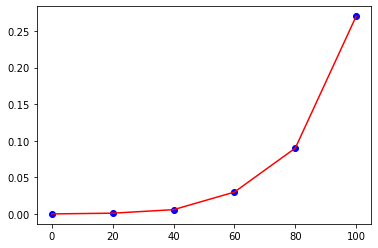

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv("polylinearregression.csv")
x = df[['Temperature']]
y = df[['Pressure']]
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)
x_poly
LR = LinearRegression()
LR.fit(x_poly,y)
plt.scatter(x,y,color="blue")
plt.plot(x,y,color="red")
plt.show()

[[133259.46969697]]


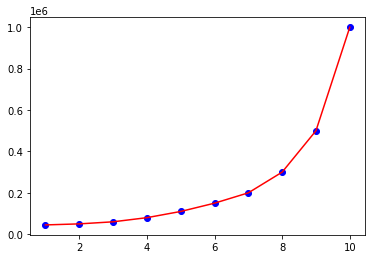

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv("Position_Salaries.csv")
x = df[['Level']]
y = df[['Salary']]
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)
x_poly
LR = LinearRegression()
LR.fit(x_poly,y)
p = LR.predict(poly.fit_transform([[6.5]]))
print(p)
plt.scatter(x,y,color="blue")
plt.plot(x,y,color="red")
plt.show()

[-3.19586999  0.16715964  3.49505824  6.81466728 10.15282821]


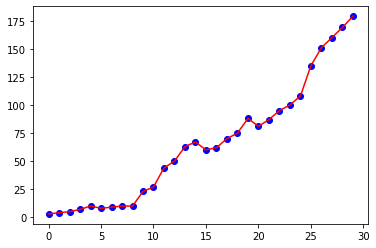

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = np.arange(0, 30) 
y = np.array([3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 
135, 151, 160, 169, 179])

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x.reshape(-1,1))
x_poly
LR = LinearRegression()
LR.fit(x_poly,y)
p = LR.predict(poly.fit_transform(np.arange(5).reshape(-1,1))) 
print(p)
plt.scatter(x,y,color="blue")
plt.plot(x,y,color="red")
plt.show()

M [[ 0.         -1.72640073  1.82947158  0.0640583 ]]
C [2.60470605]
 MSE =  13.305418468740527
 R2 =  0.8038545160525795
[[2.20688087]]


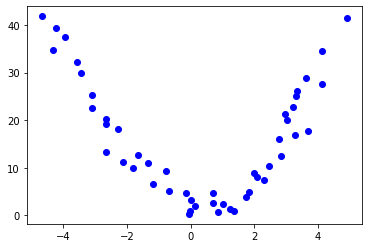

In [23]:
#Question for polynomial regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv("ice_data.csv")
x = df[['Temperature (°C)']]
y = df[['Ice Cream Sales (units)']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x_train)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_poly,y_train)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
m = LR.coef_
print("M",m)
c = LR.intercept_
print("C",c)

x_test_poly = poly.fit_transform(x_test)
y_predict = LR.predict(x_test_poly)
print(" MSE = ",mean_squared_error(y_test,y_predict))

# y_test_poly = poly.fit_transform(y_test)
# x_predict = LR.predict(y_test_poly)
# print(" MSE for ice= ",mean_squared_error(x_test,x_predict))
print(" R2 = ",r2_score(y_test,y_predict))

p = LR.predict(poly.fit_transform([[0.5]])) 
print(p)


plt.scatter(x,y,color="blue")
plt.show()

In [25]:
# ------------------------------------------------------------------------
# ------------------------------------------------------------------------
# ----------------------- CHAPTER:- 6 ------------------------------------
# ------------------------------------------------------------------------
# ------------------------------------------------------------------------

In [7]:
# KNN neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
y = df['Outcome']
x = df.drop('Outcome',axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=27)

# Train the classifier
model = knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)
print(y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print("TN", TN)
print("TN", FP)
print("TN", FN)
print("TN", TP)

# Evaluate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
Accuracy= (TP+TN)/(TP+FP+FN+TN) 
print(f'Accuracy: {accuracy * 100:.2f}%')

errorRate = 1-Accuracy
errorRate = (FP+FN)/(TP+FP+FN+TN) 
print(f'ErrorRate: {errorRate * 100:.2f}%')



# Sensitivity (also known as Recall or True Positive Rate)
# is a metric used to evaluate the performance of a classification model,
# especially in binary classification problems.

# Sensitivity= (True Positives (TP))/((True Positives (TP)+False Negatives (FN)))




# Specificity (also known as the True Negative Rate) 
# is a metric used in classification to measure how well 
# a model identifies negative cases.

# Specificity= (True Negatives (TN))/(True Negatives (TN)+False Positives (FP))




[0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0]
TN 98
TN 11
TN 24
TN 21
Accuracy: 77.27%
Accuracy: 77.27%
ErrorRate: 22.73%


In [16]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("PlayTennis.csv")
df=pd.get_dummies(data=df,drop_first=True)
y = df['play_yes']
x = df.drop('play_yes',axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

knn = KNeighborsClassifier(n_neighbors=5)

model = knn.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print("TN", TN)
print("TN", FP)
print("TN", FN)
print("TN", TP)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
Accuracy= (TP+TN)/(TP+FP+FN+TN) 
print(f'Accuracy: {accuracy * 100:.2f}%')

errorRate = 1-Accuracy
errorRate = (FP+FN)/(TP+FP+FN+TN) 
print(f'ErrorRate: {errorRate * 100:.2f}%')

Sensitivity= (TP)/(TP+FN)
print(Sensitivity)

Specificity= (TN)/(TN+FP)
print(Specificity)

pred = model.predict([[True,1,0,0,0,0]])
print(pred)

[1 1 1]
TN 0
TN 1
TN 0
TN 2
Accuracy: 66.67%
Accuracy: 66.67%
ErrorRate: 33.33%
1.0
0.0
[1]


In [28]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")
df
df = df.drop("name",axis=1)
df = df.drop("ticket",axis=1)
df = df.drop("cabin",axis=1)
df = df.dropna()
df.isna().sum()
df=pd.get_dummies(data=df,drop_first=True)
y = df['survived']
x = df.drop('survived',axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

knn = KNeighborsClassifier(n_neighbors=33)

model = knn.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print("TN", TN)
print("TN", FP)
print("TN", FN)
print("TN", TP)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
Accuracy= (TP+TN)/(TP+FP+FN+TN) 
print(f'Accuracy: {accuracy * 100:.2f}%')

errorRate = 1-Accuracy
errorRate = (FP+FN)/(TP+FP+FN+TN) 
print(f'ErrorRate: {errorRate * 100:.2f}%')

Sensitivity= (TP)/(TP+FN)
print(Sensitivity)

Specificity= (TN)/(TN+FP)
print(Specificity)

# pred = model.predict([[True,1,0,0,0,0]])
# print(pred)

[0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0]
TN 104
TN 20
TN 52
TN 33
Accuracy: 65.55%
Accuracy: 65.55%
ErrorRate: 34.45%
0.38823529411764707
0.8387096774193549


In [32]:
from sklearn.metrics import classification_report
Class_report = classification_report(y_test, y_pred)
print(Class_report)

              precision    recall  f1-score   support

           0       0.67      0.84      0.74       124
           1       0.62      0.39      0.48        85

    accuracy                           0.66       209
   macro avg       0.64      0.61      0.61       209
weighted avg       0.65      0.66      0.64       209



In [47]:
actual = ['cat','cat','cat','dog','cat','dog','cat','dog','dog','cat']
predicted = ['dog','dog','cat','cat','cat','dog','cat','dog','dog','cat']
data ={'actual':actual,'predicted':predicted}

from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

#  for dog
for i in range(len(actual)):
    if actual[i]=='dog' and predicted[i]=='dog':
        print("TP")
    elif actual[i]=='cat' and predicted[i]=='dog':
        print("FP")
    elif actual[i]=='dog' and predicted[i]=='cat':
        print("FN")
    elif actual[i]=='cat' and predicted[i]=='cat':
        print("TN")
    else:
        print("Noting for dog positive")
        
#  for cat
print("For cats")
for i in range(len(actual)):
    if actual[i]=='dog' and predicted[i]=='dog':
        print("TN")
    elif actual[i]=='cat' and predicted[i]=='dog':
        print("FN")
    elif actual[i]=='dog' and predicted[i]=='cat':
        print("FP")
    elif actual[i]=='cat' and predicted[i]=='cat':
        print("TP")
    else:
        print("Noting for dog positive")

FP
FP
TN
FN
TN
TP
TN
TP
TP
TN
For cats
FN
FN
TP
FP
TP
TN
TP
TN
TN
TP


In [63]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Churn.csv")
df = df.drop("customerID",axis=1)
df = df.drop("Unnamed: 0",axis=1)
df.isna().sum()
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

df=pd.get_dummies(data=df,drop_first=True)
y = df['Churn_Yes']
x = df.drop('Churn_Yes',axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

knn = KNeighborsClassifier(n_neighbors=5)

model = knn.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print("TN", TN)
print("TN", FP)
print("TN", FN)
print("TN", TP)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
Accuracy= (TP+TN)/(TP+FP+FN+TN) 
print(f'Accuracy: {accuracy * 100:.2f}%')

errorRate = 1-Accuracy
errorRate = (FP+FN)/(TP+FP+FN+TN) 
print(f'ErrorRate: {errorRate * 100:.2f}%')

Sensitivity= (TP)/(TP+FN)
print(Sensitivity)

Specificity= (TN)/(TN+FP)
print(Specificity)


[0 0 0 ... 1 0 0]
TN 940
TN 121
TN 196
TN 152
Accuracy: 77.50%
Accuracy: 77.50%
ErrorRate: 22.50%
0.4367816091954023
0.885956644674835


In [69]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("wine.csv")
df.isna().sum()
df['fixed acidity'] = df['fixed acidity'].fillna(df['fixed acidity'].mean())
df['volatile acidity'] = df['volatile acidity'].fillna(df['volatile acidity'].mean())
df['citric acid'] = df['citric acid'].fillna(df['citric acid'].mean())
df['residual sugar'] = df['residual sugar'].fillna(df['residual sugar'].mean())
df['chlorides'] = df['chlorides'].fillna(df['chlorides'].mean())
df['pH'] = df['pH'].fillna(df['pH'].mean())
df['sulphates'] = df['sulphates'].fillna(df['sulphates'].mean())

df=pd.get_dummies(data=df,drop_first=True)
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,0


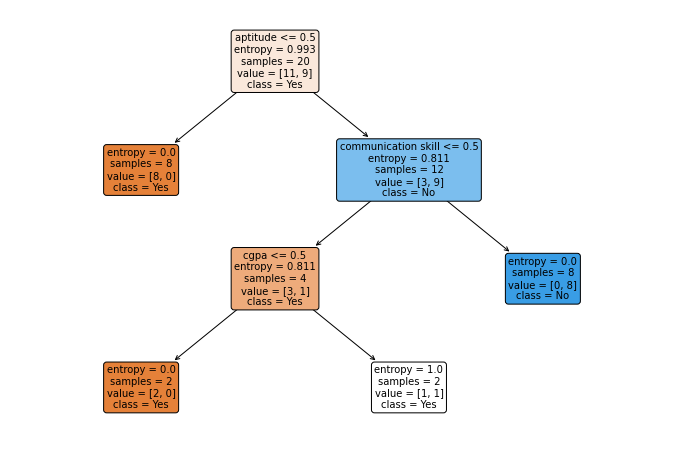

In [8]:
# DECISION TREE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("job_offers.csv")
y = df['JobOffered']
x = df.drop('JobOffered',axis=1)

from sklearn.tree import DecisionTreeClassifier, plot_tree
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(x,y)

plt.figure(figsize=(12, 8))
plot_tree(dtree, 
          feature_names=['cgpa','communication skill','aptitude','programming skill'], 
          class_names=['Yes',"No"], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()



3


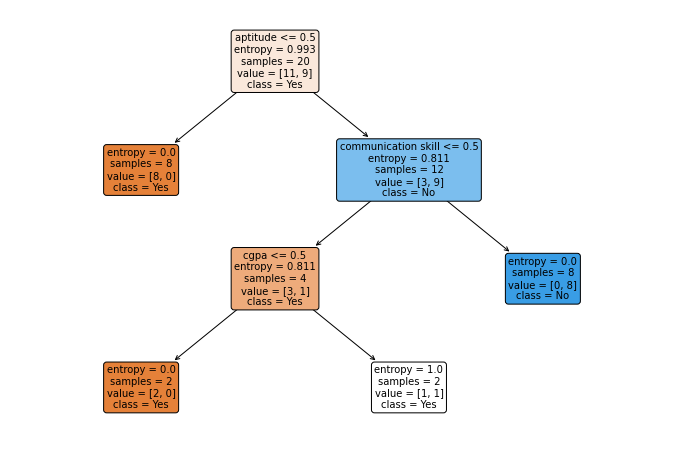

TN 11
TN 0
TN 1
Accuracy: 95.00%
ErrorRate: 5.00%
Sensitivity:  0.8888888888888888
Specificity:  1.0
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



In [23]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("job_offers.csv")
y = df['JobOffered']
x = df.drop('JobOffered',axis=1)

from sklearn.tree import DecisionTreeClassifier, plot_tree
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(x,y)

plt.figure(figsize=(12, 8))
print(dtree.get_depth())
plot_tree(dtree, 
          feature_names=['cgpa','communication skill','aptitude','programming skill'], 
          class_names=['Yes',"No"], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()


from sklearn.metrics import confusion_matrix
y_pred = dtree.predict(x)
cm = confusion_matrix(y,y_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print("TN", TN)
print("TN", FP)
print("TN", FN)

Accuracy= (TP+TN)/(TP+FP+FN+TN) 
print(f'Accuracy: {Accuracy * 100:.2f}%')

errorRate = 1-Accuracy
errorRate = (FP+FN)/(TP+FP+FN+TN) 
print(f'ErrorRate: {errorRate * 100:.2f}%')

Sensitivity= (TP)/(TP+FN)
print("Sensitivity: ",Sensitivity)

Specificity= (TN)/(TN+FP)
print("Specificity: ",Specificity)

from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

16


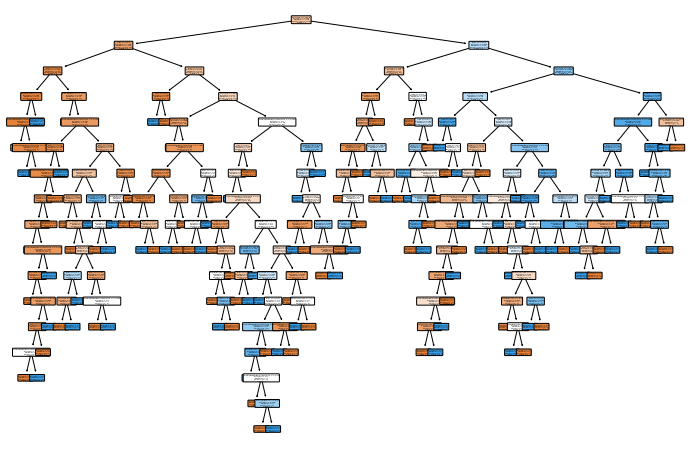

[0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0
 0 0 0 1 0 1 1 0 0]
TN 155
TN 0
TN 0
TN 76
Accuracy: 100.00%
Accuracy: 100.00%
ErrorRate: 0.00%


In [30]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
y = df['Outcome']
x = df.drop('Outcome',axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)


from sklearn.tree import DecisionTreeClassifier, plot_tree
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=26)
dtree.fit(x,y)

plt.figure(figsize=(12, 8))
print(dtree.get_depth())
plot_tree(dtree, 
          feature_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],
          class_names=['1','0'], 
          filled=True, 
          rounded=True, 
          fontsize=2)
plt.show()

y_pred = dtree.predict(x_test)
print(y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print("TN", TN)
print("TN", FP)
print("TN", FN)
print("TN", TP)

# Evaluate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
Accuracy= (TP+TN)/(TP+FP+FN+TN) 
print(f'Accuracy: {accuracy * 100:.2f}%')

errorRate = 1-Accuracy
errorRate = (FP+FN)/(TP+FP+FN+TN) 
print(f'ErrorRate: {errorRate * 100:.2f}%')